In [1]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np


实例化数据集，可视化数据集

In [2]:
X,y = make_blobs(n_samples=50, centers=2, random_state=0,cluster_std=0.6)

In [3]:
X.shape

(50, 2)

In [4]:
y.shape

(50,)

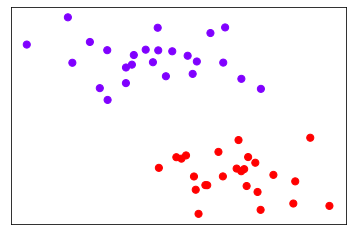

In [5]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.xticks([])
plt.yticks([])
plt.show()

![title](C:\Users\Administrator\caicaidata\jietu\contour.png)

![title](C:\Users\Administrator\caicaidata\jietu\contour1.png)

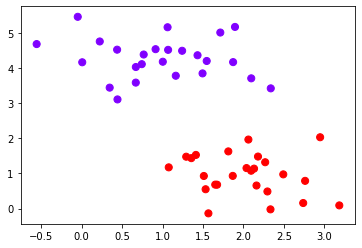

In [6]:
#首先要有散点图
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图

<font color=red size=5 face=雅黑>**画决策边界：制作网格，理解函数meshgrid**</font>

In [7]:
# 获取平面上两条坐标轴的最大值和最小值
xlim = ax.get_xlim()
ylim = ax.get_ylim() 
#默认创建(0.0, 1.0)范围内的横纵坐标

In [8]:
xlim,ylim

((-0.7541740493109252, 3.3838081780236036),
 (-0.43660961990940284, 5.772756283035797))

In [9]:
# 在最大值和最小值之间形成30个规律的数据
axisx = np.linspace(xlim[0],xlim[1],30)
axisy = np.linspace(ylim[0],ylim[1],30)

In [10]:
axisx

array([-0.75417405, -0.61148501, -0.46879596, -0.32610692, -0.18341788,
       -0.04072884,  0.1019602 ,  0.24464925,  0.38733829,  0.53002733,
        0.67271637,  0.81540542,  0.95809446,  1.1007835 ,  1.24347254,
        1.38616159,  1.52885063,  1.67153967,  1.81422871,  1.95691775,
        2.0996068 ,  2.24229584,  2.38498488,  2.52767392,  2.67036297,
        2.81305201,  2.95574105,  3.09843009,  3.24111914,  3.38380818])

In [11]:
axisy

array([-0.43660962, -0.22249355, -0.00837749,  0.20573858,  0.41985464,
        0.63397071,  0.84808677,  1.06220284,  1.27631891,  1.49043497,
        1.70455104,  1.9186671 ,  2.13278317,  2.34689923,  2.5610153 ,
        2.77513136,  2.98924743,  3.2033635 ,  3.41747956,  3.63159563,
        3.84571169,  4.05982776,  4.27394382,  4.48805989,  4.70217595,
        4.91629202,  5.13040809,  5.34452415,  5.55864022,  5.77275628])

In [12]:
axisy,axisx = np.meshgrid(axisy,axisx) 
# 使用这里形成的二维数组作为我们contour函数中的X，Y
#使用meshgrid函数将两个一维向量转换成特征矩阵 。。将特征向量转换为特征矩阵的函数
#核心是将两个特征向量广播，以便获取y.shape * x.shape这么多个坐标点的横坐标和纵坐标

In [13]:
axisy.shape

(30, 30)

In [14]:
axisx.shape

(30, 30)

In [15]:
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T
#获取y.shape * x.shape这么多个坐标点
#其中ravel()是降维函数，vstack能够将多个结构一致的一维数组按行堆叠起来
#xy就是已经形成的网络，它是遍布在整个画布上的密集的点

In [16]:
xy.shape

(900, 2)

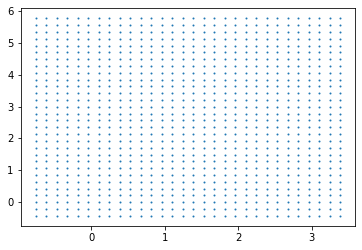

In [17]:
plt.scatter(xy[:,0],xy[:,1],s=1,cmap='rainbow')

<font color=red size=5 face=雅黑>*理解函数meshgrid和vstack的作用**</font>

In [18]:
a = np.array([1,2,3])
b = np.array([7,8])
#两两组合，会得到多少个坐标？
#答案是6个，分别是 (1,7),(2,7),(3,7),(1,8),(2,8),(3,8)

In [19]:
v1,v2 = np.meshgrid(a,b)

In [20]:
v1

array([[1, 2, 3],
       [1, 2, 3]])

In [21]:
v2

array([[7, 7, 7],
       [8, 8, 8]])

In [22]:
v1.ravel()

array([1, 2, 3, 1, 2, 3])

In [23]:
v2.ravel()

array([7, 7, 7, 8, 8, 8])

In [24]:
v = np.vstack([v1.ravel(), v2.ravel()]).T

In [25]:
v

array([[1, 7],
       [2, 7],
       [3, 7],
       [1, 8],
       [2, 8],
       [3, 8]])

In [26]:
#建模，通过fit计算出对应的决策边界
clf = SVC(kernel = "linear").fit(X,y)
Z = clf.decision_function(xy).reshape(axisx.shape)
#重要接口decision_function，返回每个输入的样本所对应的到决策边界的距离
#然后再将这个距离转换为axisx的结构,这是由于画图函数contour要求Z的结构必须与于X和Y保持一致

In [27]:
Z.shape

(30, 30)

(-0.43660961990940284, 5.772756283035797)

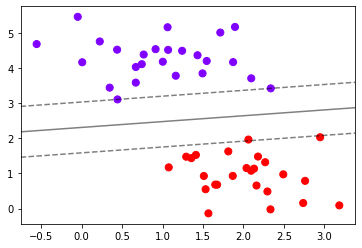

In [28]:
# Z的本质是输入的样本到决策边界的距离，而contour函数中的level其实是输入了这个距离
#首先要有散点图
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图

#画决策边界和平行于决策边界的超平面
ax.contour(axisx,axisy,Z
           ,colors="k"
#            画出三条等高线，分别是Z为-1，0，1的三条线
           ,levels=[-1,0,1]
           ,alpha=0.5
#            虚线  实线 虚线
           ,linestyles=["--","-","--"])
ax.set_xlim(xlim)
ax.set_ylim(ylim)

<font color=red size=5 face=雅黑>*将绘图过程包装成函数**</font>

In [29]:
# 让我们用一个点来试试看：
X[10]

array([1.71444449, 5.02521524])

In [30]:
# 第10个点到决策边界的距离，reshape是放到contour中画图
clf.decision_function(X[10].reshape(1,2))

array([-3.33917354])

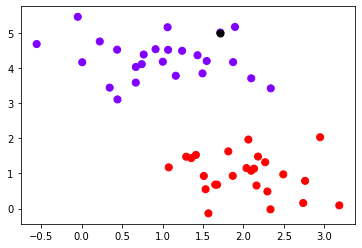

In [31]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.scatter(X[10,0],X[10,1],c='black',s=50,cmap="rainbow")

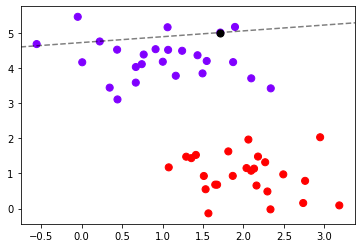

In [32]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.scatter(X[10,0],X[10,1],c='black',s=50,cmap="rainbow")
# 获取当前的子图，如果不存在，则创建新的子图
ax = plt.gca()
#画决策边界和平行于决策边界的超平面
ax.contour(axisx,axisy,Z
           ,colors="k"
           ,levels=[-3.33917354]
           ,alpha=0.5
           ,linestyles=["--","-","--"])

<font color=red size=5 face=雅黑>**将上述过程包装成函数：**</font>

In [33]:
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x) 
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"]) 
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

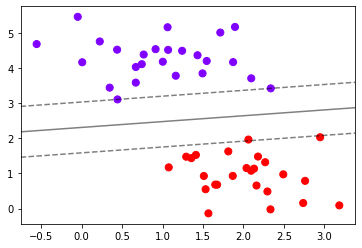

In [34]:
#则整个绘图过程可以写作：
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

<font color=red size=5 face=雅黑>**探索建好的模型：**</font>

In [35]:
clf.predict(X)
# 根据决策边界，对X中的样本进行分类，返回的结构为n_samples

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

In [36]:
clf.score(X,y)
# 返回给定测试数据和标签的平均准确度。没有分训练集和测试集

1.0

In [37]:
clf.support_vectors_
# 返回支持向量，即超平面上的点

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [38]:
clf.n_support_
# 返回每个类中支持向量的个数

array([2, 1])

<font color=red size=5 face=雅黑>**推广到非线性**</font>

In [39]:
from sklearn.datasets import make_circles
X,y = make_circles(100, factor=0.1, noise=.1)


In [40]:
X.shape

(100, 2)

In [41]:
y.shape

(100,)

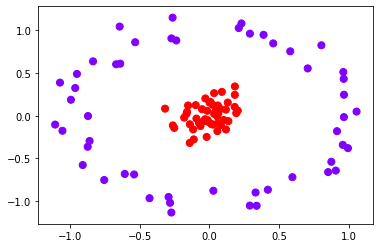

In [42]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.show()

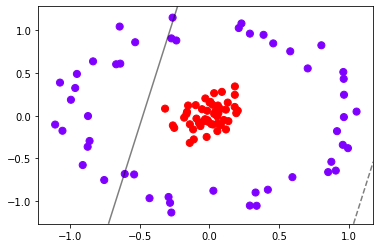

In [43]:
# 试试看用我们已经定义的函数来划分这个数据的决策边界：

clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

In [44]:
clf.score(X,y)
# 训练误差很大，测试集效果可能更低，不适合非线性数据

0.67

明显，现在线性SVM已经不适合于我们的状况了，我们无法找出一条直线来划分我们的数据集，让直线的两边分别是两种类别。这个时候，如果我们能够在原本的X和y的基础上，添加一个维度r，变成三维，我们可视化这个数据，来看看添加维度让我们的数据如何变化。

In [45]:
#定义一个由x计算出来的新维度r
r = np.exp(-(X**2).sum(1))

In [46]:
rlim = np.linspace(min(r),max(r),100)

In [47]:
r.shape

(100,)

In [48]:
rlim

array([0.22156112, 0.22940668, 0.23725223, 0.24509778, 0.25294333,
       0.26078888, 0.26863443, 0.27647999, 0.28432554, 0.29217109,
       0.30001664, 0.30786219, 0.31570775, 0.3235533 , 0.33139885,
       0.3392444 , 0.34708995, 0.3549355 , 0.36278106, 0.37062661,
       0.37847216, 0.38631771, 0.39416326, 0.40200882, 0.40985437,
       0.41769992, 0.42554547, 0.43339102, 0.44123657, 0.44908213,
       0.45692768, 0.46477323, 0.47261878, 0.48046433, 0.48830989,
       0.49615544, 0.50400099, 0.51184654, 0.51969209, 0.52753764,
       0.5353832 , 0.54322875, 0.5510743 , 0.55891985, 0.5667654 ,
       0.57461095, 0.58245651, 0.59030206, 0.59814761, 0.60599316,
       0.61383871, 0.62168427, 0.62952982, 0.63737537, 0.64522092,
       0.65306647, 0.66091202, 0.66875758, 0.67660313, 0.68444868,
       0.69229423, 0.70013978, 0.70798534, 0.71583089, 0.72367644,
       0.73152199, 0.73936754, 0.74721309, 0.75505865, 0.7629042 ,
       0.77074975, 0.7785953 , 0.78644085, 0.7942864 , 0.80213

In [49]:
from mpl_toolkits import mplot3d

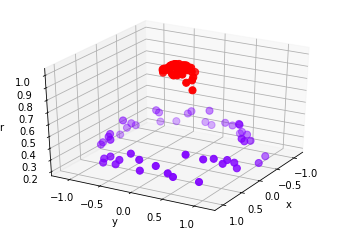

In [50]:
#定义一个绘制三维图像的函数
#elev表示上下旋转的角度
#azim表示平行旋转的角度
def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
#   调整旋转角度
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()
    
plot_3D()

可以看到，此时数据是线性可分的了，找到一个平面，平面上的数据是一类，平面下的数据是另一类。

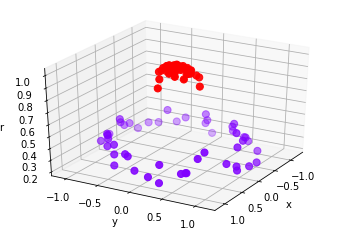

In [51]:
#如果放到jupyter notebook中运行  独有功能，内核是Ipython
# jupyter lab中没有该功能，因为内核是python3
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
X,y = make_circles(100, factor=0.1, noise=.1)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")

def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x) 
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

r = np.exp(-(X**2).sum(1))

rlim = np.linspace(min(r),max(r),100)

from mpl_toolkits import mplot3d

def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()

from ipywidgets import interact,fixed
# 横向反转-180，180
interact(plot_3D,elev=[0,30,60,90,120],azip=(-180,180),X=fixed(X),y=fixed(y))
plt.show()

此时我们的数据在三维空间中，我们的超平面就是一个二维平面。明显我们可以用一个平面将两类数据隔开，这个平面就是我们的超平面。我们刚才做的，计算r，并将r作为数据的第三维度来讲数据升维的过程，被称为“核变换”，即是将数据投影到高维空间中，以寻找能够将数据完美分割的超平面，而在高维空间中计算来找出超平面的函数就叫做核函数。在SVM中，这个功能由参数“kernel”控制。之前我们一直使用这个参数，但是没有给大家解释，我们使用的是“linear"，线性核函数，只能用于线性的情况。刚才我们使用的计算r的方法，其实是高斯径向基核函数，在参数”kernel“中输入”rbf“就可以使用。我们来看看模型找出的决策边界时什么样：

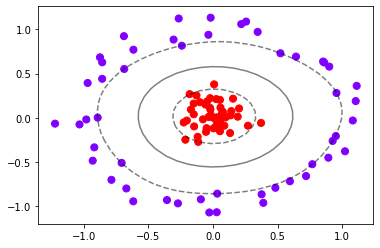

In [52]:
clf = SVC(kernel = "rbf").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

In [53]:
clf.score(X,y)

1.0

![title](C:\Users\Administrator\caicaidata\jietu\hehanshu1.jpg)

In [54]:
# 1、导入所需要的类和模块

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap   #
from sklearn.svm import SVC
from sklearn.datasets import make_circles, make_moons, make_blobs,make_classification

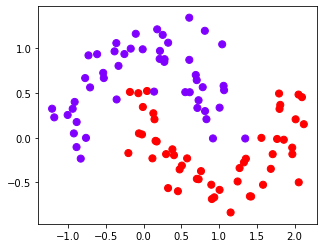

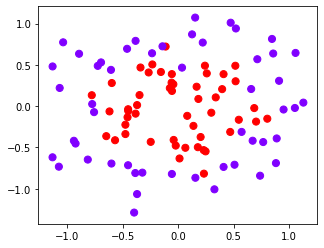

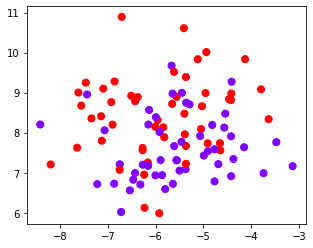

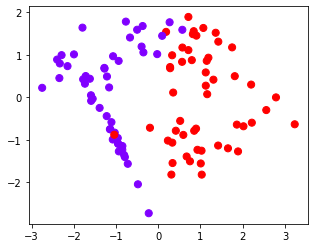

In [55]:
# 2、创建数据集，定义核函数的选择

n_samples = 100
datasets = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=0),
    make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
#     混杂数据集 不好分
    make_blobs(n_samples=n_samples, centers=2, random_state=5),
    make_classification(n_samples=n_samples,n_features = 2,n_informative=2,n_redundant=0, random_state=5)
    # n_informative指带信息的特征有几个,n_redundant指不带信息的特征有几个 2-2=0
 ]
Kernel = ["linear","poly","rbf","sigmoid"] #四个数据集分别是什么样子呢？
for X,Y in datasets:
    plt.figure(figsize=(5,4))
    plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="rainbow")

In [58]:
len(datasets)

4

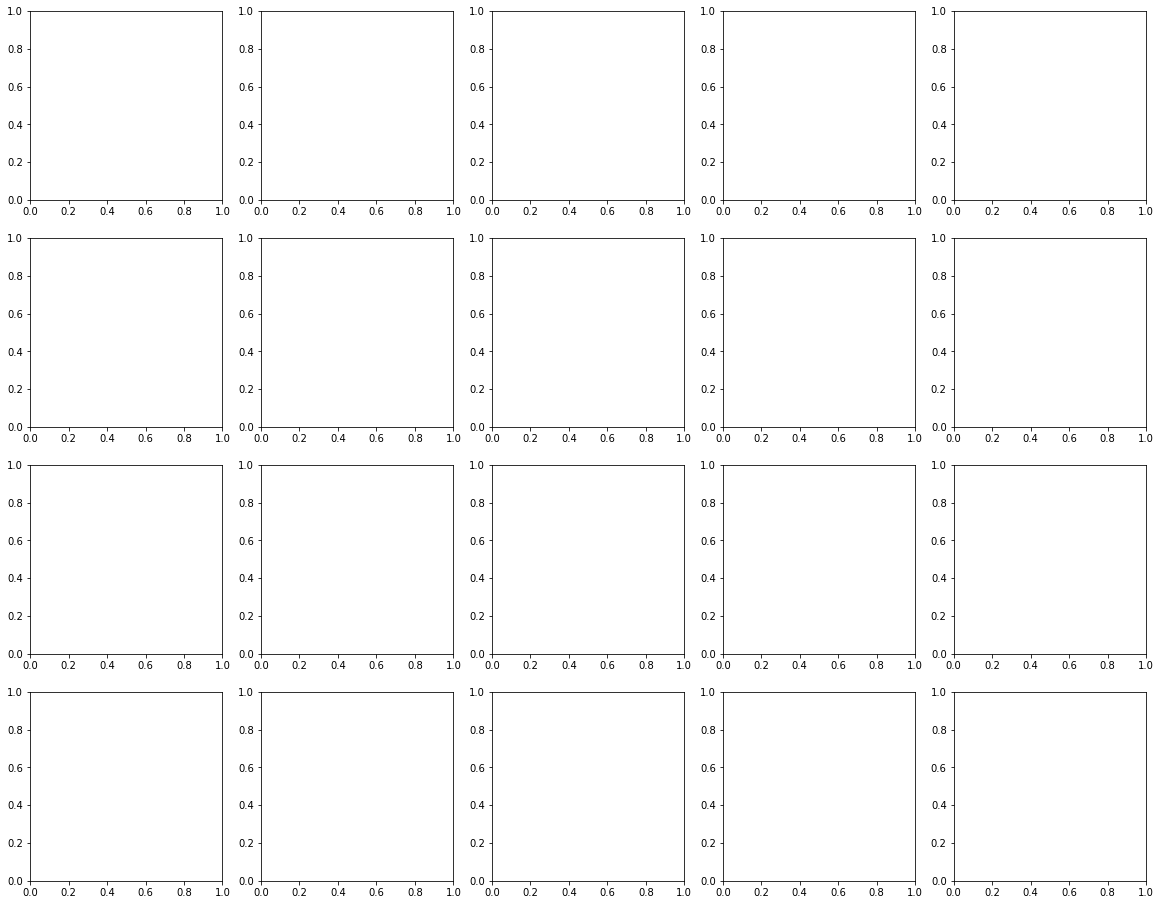

In [59]:
# 3. 构建子图
nrows=len(datasets)
ncols=len(Kernel) + 1
fig, axes = plt.subplots(nrows, ncols,figsize=(20,16))

In [61]:
# 4. 开始进行子图循环  enumerate,map,zip

len([*enumerate(datasets)])
#  [*enumerate(datasets)]里面数据 index,(X,Y)=[(索引，array([特征矩阵X]，[标签Y]))]

4

In [62]:
[*enumerate(Kernel)]

[(0, 'linear'), (1, 'poly'), (2, 'rbf'), (3, 'sigmoid')]

D:\ruanjiananzhuang\anaconda3\lib\site-packages\ipykernel_launcher.py:49: UserWarning: No contour levels were found within the data range.


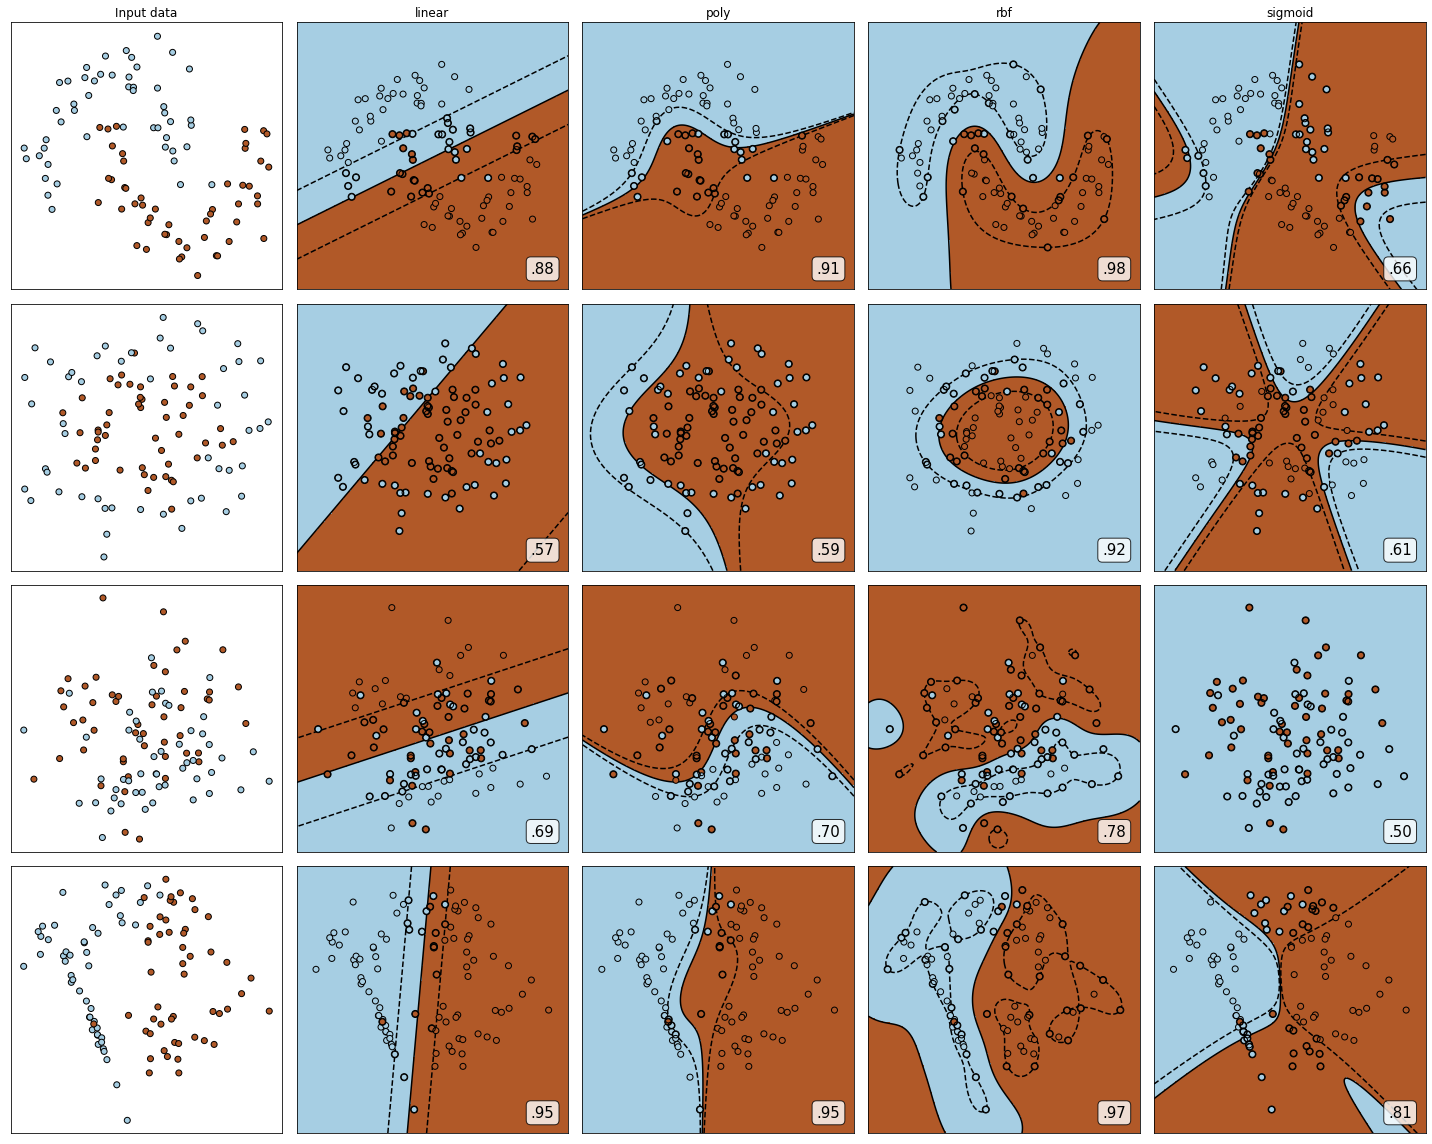

In [64]:
# 3. 构建子图
nrows=len(datasets)
ncols=len(Kernel) + 1
fig, axes = plt.subplots(nrows, ncols,figsize=(20,16))

#第一层循环：在不同的数据集中循环
for ds_cnt, (X,Y) in enumerate(datasets):
    #在图像中的第一列，放置原数据的分布
    ax = axes[ds_cnt, 0]
    if ds_cnt == 0:
        ax.set_title("Input data")
#   zorder散点图放在最上面，数字越大越优先
    ax.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,edgecolors='k') # zorder 是指将值显示在上面的参数，zorder越大，显示的位置越在上面。
    ax.set_xticks(())
    ax.set_yticks(())

    #第二层循环：在不同的核函数中循环
    #从图像的第二列开始，一个个填充分类结果
    for est_idx, kernel in enumerate(Kernel):

        #定义子图位置
        ax = axes[ds_cnt, est_idx + 1]

        #建模
        clf = SVC(kernel=kernel, gamma=2).fit(X, Y) # 训练，建立决策边界
        score = clf.score(X, Y)

        #绘制图像本身分布的散点图
        ax.scatter(X[:, 0], X[:, 1], c=Y,zorder=10,cmap=plt.cm.Paired,edgecolors='k')
        #绘制支持向量
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50,
                    facecolors='none', zorder=10, edgecolors='k')

        #绘制决策边界 有边界
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

        #np.mgrid，合并了我们之前使用的np.linspace和np.meshgrid的用法
        #一次性使用最大值和最小值来生成网格
        #表示为[起始值：结束值：步长]
        #如果步长是复数，则其整数部分就是起始值和结束值之间创建的点的数量，并且结束值被包含在内
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        #np.c_，类似于np.vstack的功能  网格坐标。decision_function计算点的距离
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        #填充等高线不同区域的颜色
        ax.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
        #绘制等高线
        ax.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-1, 0, 1])

        #设定坐标轴为不显示
        ax.set_xticks(())
        ax.set_yticks(())

        #将标题放在第一行的顶上
        if ds_cnt == 0:
            ax.set_title(kernel)

        #为每张图添加分类的分数，1横坐标的位置，2纵坐标的位置，3要填的内容 ；lstrip('0')是只显示点后面的小数  
        ax.text(0.95, 0.06, ('%.2f' % score).lstrip('0')
               , size=15
               , bbox=dict(boxstyle='round', alpha=0.8, facecolor='white')
               #为分数添加一个白色的格子作为底色
               , transform=ax.transAxes  #确定文字所对应的坐标轴，就是ax子图的坐标轴本身
               , horizontalalignment='right' #位于坐标轴的什么方向
               )
# 图像之间是紧缩显示
plt.tight_layout()
plt.show()

![title](C:\Users\Administrator\caicaidata\jietu\hehanshu2.jpg)

乳腺癌SVM调参 [菜菜讲解链接](https://www.cnblogs.com/ku1274755259/p/11131936.html)

实例：分类树在合成数集上的表现

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.tree import DecisionTreeClassifier

2. 生成三种数据集
我们先从sklearn自带的数据库中生成三种类型的数据集：
1）月亮型数据，
2）环形数据，
3）二分型数据

In [2]:
#make_classification库生成随机的二分型数据
X, y = make_classification(n_samples=100, #生成100个样本
                           n_features=2,  #包含2个特征，即生成二维数据
                           n_redundant=0, #添加冗余特征0个
                           n_informative=2, #包含信息的特征是2个
                           random_state=1,  #随机模式1
                           n_clusters_per_class=1 #每个簇内包含的标签类别有1个
                          )

#在这里可以查看一下X和y，其中X是100行带有两个2特征的数据，y是二分类标签
#也可以画出散点图来观察一下X中特征的分布
#plt.scatter(X[:,0],X[:,1])

#从图上可以看出，生成的二分型数据的两个簇离彼此很远，这样不利于我们测试分类器的效果，因此我们使用np生成随机数组，通过让已经生成的二分型数据点加减0~1之间的随机数，使数据分布变得更散更稀疏
#注意，这个过程只能够运行一次，因为多次运行之后X会变得非常稀疏，两个簇的数据会混合在一起，分类器的效应会继续下降
rng = np.random.RandomState(2) #生成一种随机模式
X += 2 * rng.uniform(size=X.shape) #加减0~1之间的随机数
linearly_separable = (X, y) #生成了新的X，依然可以画散点图来观察一下特征的分布
#plt.scatter(X[:,0],X[:,1])

#用make_moons创建月亮型数据，make_circles创建环形数据，并将三组数据打包起来放在列表datasets中
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

3. 画出三种数据集和三棵决策树的分类效应图像

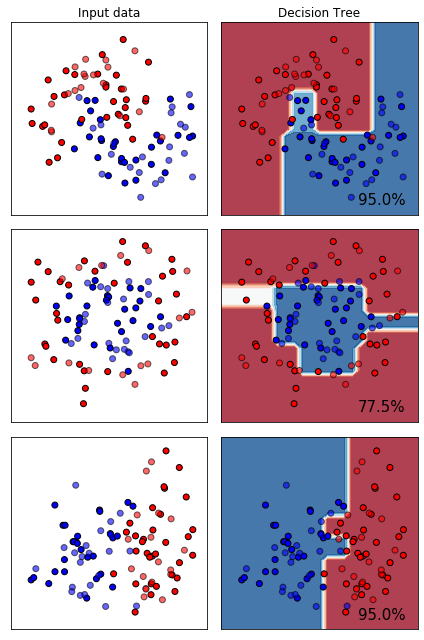

In [3]:
#创建画布，宽高比为6*9
figure = plt.figure(figsize=(6, 9))
#设置用来安排图像显示位置的全局变量i
i = 1

#开始迭代数据，对datasets中的数据进行for循环

for ds_index, ds in enumerate(datasets):
    
    #对X中的数据进行标准化处理，然后分训练集和测试集
    X, y = ds
    X = StandardScaler().fit_transform(X) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
    
    #找出数据集中两个特征的最大值和最小值，让最大值+0.5，最小值-0.5，创造一个比两个特征的区间本身更大一点的区间
    x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    #用特征向量生成网格数据，网格数据，其实就相当于坐标轴上无数个点
    #函数np.arange在给定的两个数之间返回均匀间隔的值，0.2为步长
    #函数meshgrid用以生成网格数据，能够将两个一维数组生成两个二维矩阵。
    #如果第一个数组是narray，维度是n，第二个参数是marray，维度是m。那么生成的第一个二维数组是以narray为行，m行的矩阵，而第二个二维数组是以marray的转置为列，n列的矩阵
    #生成的网格数据，是用来绘制决策边界的，因为绘制决策边界的函数contourf要求输入的两个特征都必须是二维的
    array1,array2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2),
                         np.arange(x2_min, x2_max, 0.2))

    #接下来生成彩色画布
    #用ListedColormap为画布创建颜色，#FF0000正红，#0000FF正蓝
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    #在画布上加上一个子图，数据为len(datasets)行，2列，放在位置i上
    ax = plt.subplot(len(datasets), 2, i)
    
    #到这里为止，已经生成了0~1之间的坐标系3个了，接下来为我们的坐标系放上标题
    #我们有三个坐标系，但我们只需要在第一个坐标系上有标题，因此设定if ds_index==0这个条件
    if ds_index == 0:
        ax.set_title("Input data")
    
    #将数据集的分布放到我们的坐标系上
    #先放训练集
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
    #放测试集
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,edgecolors='k')
    
     #为图设置坐标轴的最大值和最小值，并设定没有坐标轴
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    #每次循环之后，改变i的取值让图每次位列不同的位置
    i += 1
    
    #至此为止，数据集本身的图像已经布置完毕，运行以上的代码，可以看见三个已经处理好的数据集
    
    #############################从这里开始是决策树模型##########################
    
    #迭代决策树，首先用subplot增加子图，subplot(行，列，索引)这样的结构，并使用索引i定义图的位置
    #在这里，len(datasets)其实就是3，2是两列
    #在函数最开始，我们定义了i=1，并且在上边建立数据集的图像的时候，已经让i+1,所以i在每次循环中的取值是2，4，6
    ax = plt.subplot(len(datasets),2,i)
    
    #决策树的建模过程：实例化 → fit训练 → score接口得到预测的准确率
    clf = DecisionTreeClassifier(max_depth=5)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    
    #绘制决策边界，为此，我们将为网格中的每个点指定一种颜色[x1_min，x1_max] x [x2_min，x2_max]
    #分类树的接口，predict_proba，返回每一个输入的数据点所对应的标签类概率
    #类概率是数据点所在的叶节点中相同类的样本数量/叶节点中的样本总数量
    #由于决策树在训练的时候导入的训练集X_train里面包含两个特征，所以我们在计算类概率的时候，也必须导入结构相同的数组，即是说，必须有两个特征
    #ravel()能够将一个多维数组转换成一维数组
    #np.c_是能够将两个数组组合起来的函数
    #在这里，我们先将两个网格数据降维降维成一维数组，再将两个数组链接变成含有两个特征的数据，再带入决策树模型，生成的Z包含数据的索引和每个样本点对应的类概率，再切片，且出类概率
    Z = clf.predict_proba(np.c_[array1.ravel(),array2.ravel()])[:, 1]
    
    #np.c_[np.array([1,2,3]), np.array([4,5,6])]
    
    #将返回的类概率作为数据，放到contourf里面绘制去绘制轮廓
    Z = Z.reshape(array1.shape)
    ax.contourf(array1, array2, Z, cmap=cm, alpha=.8)
    
    #将数据集的分布放到我们的坐标系上
    # 将训练集放到图中去
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
    # 将测试集放到图中去
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,edgecolors='k', alpha=0.6)
    
    #为图设置坐标轴的最大值和最小值
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    #设定坐标轴不显示标尺也不显示数字
    ax.set_xticks(())
    ax.set_yticks(())
    
    #我们有三个坐标系，但我们只需要在第一个坐标系上有标题，因此设定if ds_index==0这个条件
    if ds_index == 0:
        ax.set_title("Decision Tree")
    
    #写在右下角的数字    
    ax.text(array1.max() - .3, array2.min() + .3, ('{:.1f}%'.format(score*100)),size=15, horizontalalignment='right')
    
    #让i继续加一
    i += 1

plt.tight_layout()
plt.show()

从图上来看，每一条线都是决策树在二维平面上画出的一条决策边界，每当决策树分枝一次，就有一条线出现。当数据的维度更高的时候，这条决策边界就会由线变成面，甚至变成我们想象不出的多维图形。

同时，很容易看得出，分类树天生不擅长环形数据。每个模型都有自己的决策上限，所以一个怎样调整都无法提升表现的可能性也是有的。当一个模型怎么调整都不行的时候，我们可以选择换其他的模型使用，不要在一棵树上吊死。顺便一说，最擅长月亮型数据的是最近邻算法，RBF支持向量机和高斯过程；最擅长环形数据的是最近邻算法和高斯过程；最擅长对半分的数据的是朴素贝叶斯，神经网络和随机森林。